In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load CSV files for Nepal, US, Australia and India Weather

NP_weather = pd.read_csv('nepal_data.csv')
US_AUS_weather = pd.read_csv('US-and-AU_weather_data.csv')
IN_weather = pd.read_csv('IN_weather_data.csv')


In [3]:
NP_weather.head()

,DATE,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN
0,1971-01-01,"KATHMANDU AIRPORT, NP",27.7,85.367,1337,NaN,NaN,17.3,3.8
1,1971-01-02,"KATHMANDU AIRPORT, NP",27.7,85.367,1337,NaN,NaN,17.8,6.1
2,1971-01-03,"KATHMANDU AIRPORT, NP",27.7,85.367,1337,NaN,NaN,18.3,2.9
3,1971-01-04,"KATHMANDU AIRPORT, NP",27.7,85.367,1337,NaN,NaN,17.3,5.3
4,1971-01-05,"KATHMANDU AIRPORT, NP",27.7,85.367,1337,NaN,NaN,17.2,4.9


In [4]:
US_AUS_weather.head()

,DATE,STATION,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN
0,2000-01-01,USW00012839,25.78805,-80.31694,1.4,0.0,22.2,27.2,17.2
1,2000-01-02,USW00012839,25.78805,-80.31694,1.4,0.0,22.8,26.1,18.9
2,2000-01-03,USW00012839,25.78805,-80.31694,1.4,0.0,22.2,26.7,17.8
3,2000-01-04,USW00012839,25.78805,-80.31694,1.4,0.0,24.4,26.7,21.7
4,2000-01-05,USW00012839,25.78805,-80.31694,1.4,6.1,23.3,26.7,19.4


In [5]:
IN_weather.head()

,DATE,STATION,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN
0,2015-12-07,IN024140300,22.533,88.333,6,NaN,22.4,28.6,NaN
1,2015-12-08,IN024140300,22.533,88.333,6,NaN,22.7,28.1,NaN
2,2015-12-09,IN024140300,22.533,88.333,6,NaN,22.8,28.3,18.8
3,2015-12-10,IN024140300,22.533,88.333,6,NaN,23.4,29.1,18.7
4,2015-12-11,IN024140300,22.533,88.333,6,NaN,24.5,29.1,20.6


In [6]:
#Dropping unnecesssary columns

NP_weather = NP_weather.drop(['NAME'], axis=1)
US_AUS_weather = US_AUS_weather.drop(['STATION'], axis=1)
IN_weather = IN_weather.drop(['STATION'], axis=1)

In [7]:
weather = pd.concat([NP_weather, US_AUS_weather, IN_weather])

In [8]:
weather.head()

,DATE,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN
0,1971-01-01,27.7,85.367,1337.0,NaN,NaN,17.3,3.8
1,1971-01-02,27.7,85.367,1337.0,NaN,NaN,17.8,6.1
2,1971-01-03,27.7,85.367,1337.0,NaN,NaN,18.3,2.9
3,1971-01-04,27.7,85.367,1337.0,NaN,NaN,17.3,5.3
4,1971-01-05,27.7,85.367,1337.0,NaN,NaN,17.2,4.9


In [9]:
weather.isna().sum()

DATE             0
LATITUDE         0
LONGITUDE        0
ELEVATION        0
PRCP         27946
TAVG         37973
TMAX         21188
TMIN         21119
dtype: int64

In [10]:
#Handling missing values

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
weather[['PRCP', 'TAVG', 'TMAX', 'TMIN']] = imputer.fit_transform(weather[['PRCP', 'TAVG', 'TMAX', 'TMIN']])


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [11]:
weather.isna().sum()

DATE         0
LATITUDE     0
LONGITUDE    0
ELEVATION    0
PRCP         0
TAVG         0
TMAX         0
TMIN         0
dtype: int64

In [12]:
weather.describe()

,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN
count,131023.000000,131023.000000,131023.000000,131023.000000,131023.000000,131023.000000,131023.000000
mean,11.084684,40.736949,422.711448,3.183272,18.851095,24.506470,13.587350
std,29.417130,99.727758,585.361716,10.527212,8.140747,8.394314,8.433917
min,-37.665500,-118.386600,1.400000,-13.262471,-26.100000,-23.200000,-31.000000
25%,-23.795100,-80.316940,15.400000,0.000000,14.200000,20.000000,8.681013
50%,25.788050,85.367000,65.000000,0.000000,19.392723,25.000000,13.960669
75%,33.938160,115.976400,1210.000000,3.264182,24.730851,30.500000,19.800000
max,41.960170,152.975300,1647.200000,461.000000,38.200000,50.874162,46.246578


In [13]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131023 entries, 0 to 21035
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   DATE       131023 non-null  object 
 1   LATITUDE   131023 non-null  float64
 2   LONGITUDE  131023 non-null  float64
 3   ELEVATION  131023 non-null  float64
 4   PRCP       131023 non-null  float64
 5   TAVG       131023 non-null  float64
 6   TMAX       131023 non-null  float64
 7   TMIN       131023 non-null  float64
dtypes: float64(7), object(1)
memory usage: 9.0+ MB


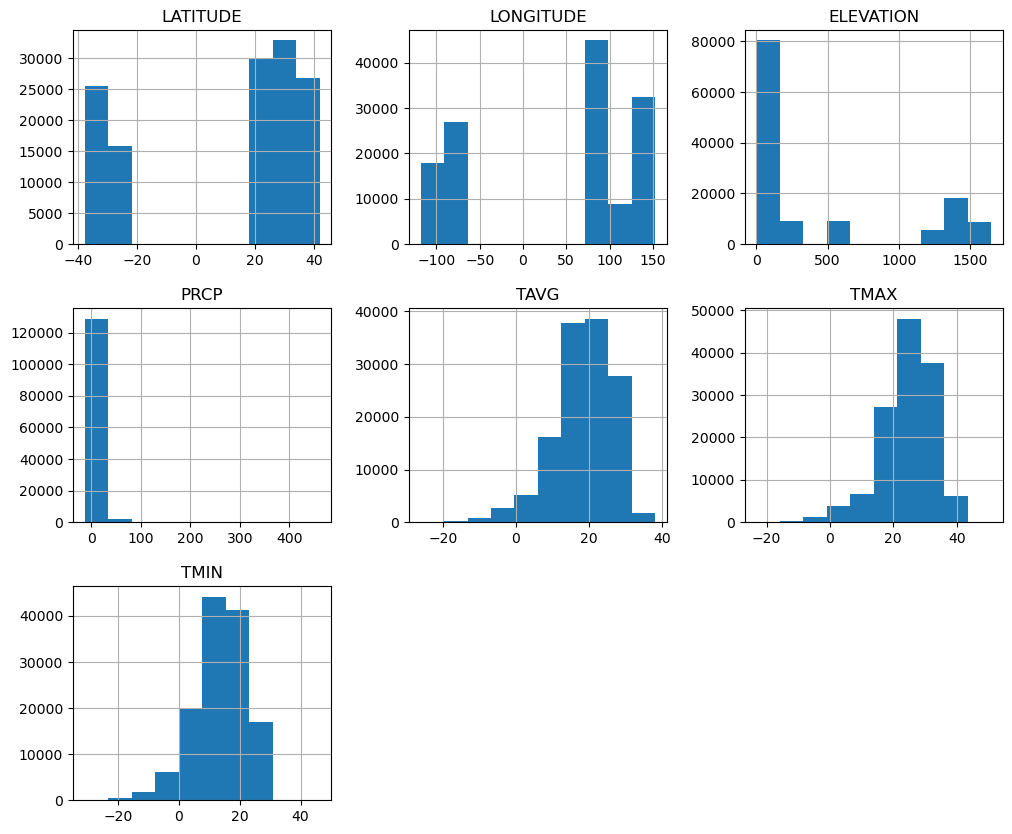

In [14]:
# Histogram

import matplotlib.pyplot as plt

weather.hist(figsize=(12, 10))
plt.show()


In [15]:
weather = weather.drop(columns = 'DATE')
weather = weather.drop(columns = 'ELEVATION')

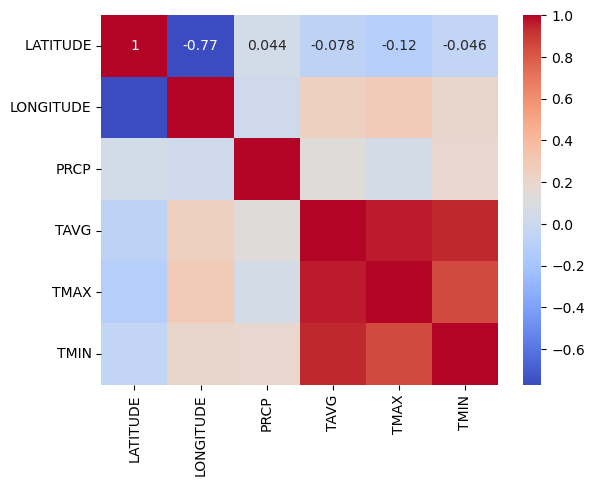

In [16]:
# Correlation matrix
import seaborn as sns

corr = weather.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

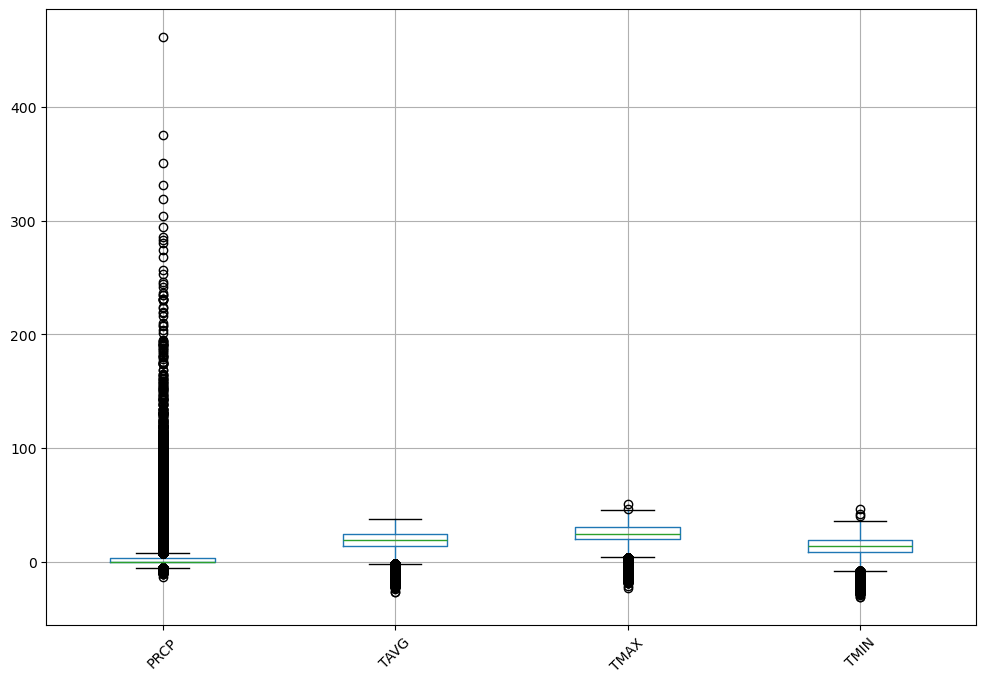

In [17]:
# Box Plot

plt.figure(figsize=(12, 8))
weather.drop(['LATITUDE', 'LONGITUDE'], axis=1).boxplot()
plt.xticks(rotation=45)
plt.show()

In [18]:
weather.head(2)

,LATITUDE,LONGITUDE,PRCP,TAVG,TMAX,TMIN
0,27.7,85.367,0.322424,10.553310,17.3,3.8
1,27.7,85.367,1.599753,11.833307,17.8,6.1


In [19]:
weather.to_csv('cleaned_weather_data.csv', index=False)